# Imports

In [25]:
#!pip install torchviz
#!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.8 MB/s eta 0:00:00


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.nn as nn
import torch.optim as optim


# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data generation 

In [27]:
true_w = 4
true_b = 2

N = 500

# Data generation 
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_w * x + true_b + epsilon

## Split the data between train and test 

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
x_train.shape, x_test.shape

((400, 1), (100, 1))

In [30]:
y_train.shape, y_test.shape

((400, 1), (100, 1))

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

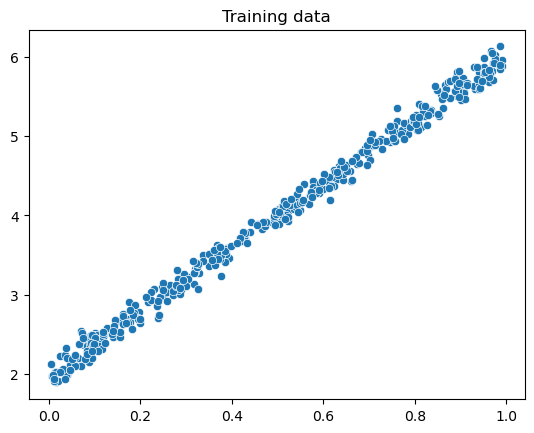

In [44]:
sns.scatterplot(x=x_train.ravel(), y=y_train.ravel());
plt.title("Training data")
plt.show()


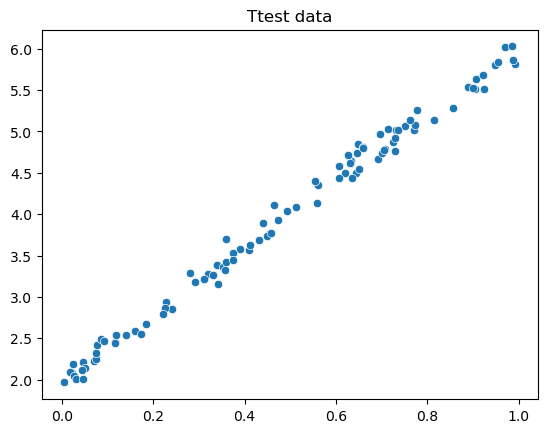

In [49]:
sns.scatterplot(x=x_test.ravel(), y=y_test.ravel());
plt.title("Ttest data")
plt.show()

In [46]:
x_train.shape

(400, 1)

In [48]:
x_train.ravel().shape

(400,)

## Gradient Descent

### Step 0 - Random Initialization

In [50]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


### Step 1 - Compute Model’s Predictions

In [51]:
y_pred = w * x_train + b

### Step 2 - Compute the Loss

In [57]:
error = y_pred - y_train
loss = np.mean((error) ** 2)

print(loss)

14.43616436545858


### Step 3 - Compute the Gradients

In [58]:
b_grad = np.mean(2 * error)
w_grad = np.mean(2 * error * x_train)

print(b_grad, w_grad)

-7.175308983804242 -4.362301206705935


In [59]:
print(b, w)

[0.49671415] [-0.1382643]


### Step 4 - Update the Parameters

In [61]:
print(f"Existing b and w are : {b}, {w}")
lr = 0.01 
b = b - lr * b_grad
w = w - lr * w_grad

print(f"New b and w are : {b}, {w}")
print(f"Actual b and w are : {true_b}, {true_w}")

Existing b and w are : [0.56846724], [-0.09464129]
New b and w are : [0.64022033], [-0.05101828]
Actual b and w are : 2, 4


### Step 5 - Rinse and Repeat!

In [65]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(f"Initial random  b and w are : {b}, {w}")

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    y_pred = w * x_train + b
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!   
    error = y_pred - y_train
    # It is a regression, so it computes mean squared error (MSE)
    loss = np.mean((error) ** 2)

    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = np.mean(2 * error)
    w_grad = np.mean(2 * error * x_train)
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(f"Final  b and w are : {b}, {w}")
print(f"Actual b and w are : {true_b}, {true_w}")

Initial random  b and w are : [0.49671415], [-0.1382643]
Final  b and w are : [1.98772558], [4.02327554]
Actual b and w are : 2, 4


### Sanity Check

In [66]:
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.98772463] [4.02327729]


## Pytorch 

In [68]:
scaler = torch.tensor(2.1)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2, 3), dtype=torch.float32)
tensor = torch.randn((2, 3, 4), dtype=torch.float32)

print(scaler)
print(vector)
print(matrix)
print(tensor)     

tensor(2.1000)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-0.2720, -0.3307,  2.1897,  0.1660],
         [ 1.2557, -1.1527, -0.6401,  1.3178],
         [ 0.7775,  0.1197,  0.5085,  2.1315]],

        [[ 1.4719, -2.0089,  0.3485, -0.7374],
         [-3.1104,  1.4600,  0.4043,  1.0831],
         [-1.7966, -0.7776,  0.6979,  0.5354]]])


In [69]:
scaler.shape, vector.shape, matrix.shape, tensor.shape

(torch.Size([]), torch.Size([3]), torch.Size([2, 3]), torch.Size([2, 3, 4]))

In [70]:
scaler.size(), vector.size(), matrix.size(), tensor.size()

(torch.Size([]), torch.Size([3]), torch.Size([2, 3]), torch.Size([2, 3, 4]))

Beware: The view() method only returns a tensor with the
desired shape that shares the underlying data with the original
tensor—it DOES NOT create a new, independent, tensor!
The reshape() method may or may not create a copy! The
reasons behind this apparently weird behavior are beyond the
scope of this section, but this behavior is the reason why view()
is preferred.

In [80]:
same_matrix = matrix.view(1, 6)

same_matrix[0, 1] = 2
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


If you want to copy all data, that is, duplicate the data in memory, you may use
either its new_tensor() or clone() methods.

In [81]:
different_matrix = matrix.new_tensor(matrix.view(1,6))
different_matrix[0, 1] = 3

print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/tmp/ipykernel_316/2581576872.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix = matrix.new_tensor(matrix.view(1,6))


In [84]:
different_matrix = matrix.view(1, 6).clone().detach()
different_matrix[0, 1] = 3

print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


## Loading Data, Devices, and CUDA

In [86]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [88]:
x_train_tensor.float().dtype

torch.float32

In [89]:
dummay_array = np.array([1,2,3])
dummy_tensor = torch.as_tensor(dummay_array) # it doesnt make any copy of the data 

dummy_tensor[1] = 100
print(dummay_array, dummy_tensor)

[  1 100   3] tensor([  1, 100,   3])


In [90]:
dummay_array = np.array([1,2,3])
dummy_tensor = torch.tensor(dummay_array) # it makes a copy of the day

dummy_tensor[1] = 100
print(dummay_array, dummy_tensor)

[1 2 3] tensor([  1, 100,   3])


In [91]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [92]:
device

'cuda'

In [93]:
torch.cuda.device_count()

1

In [94]:
torch.cuda.get_device_name()

'Tesla T4'

In [95]:
gpu_tensor = torch.as_tensor(x_train, device=device)

In [96]:
gpu_tensor[0]

tensor([0.8530], device='cuda:0', dtype=torch.float64)

In [101]:
a = gpu_tensor.to('cpu')
a[0], a.device

(tensor([0.8530], dtype=torch.float64), device(type='cpu'))

In [102]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [103]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [108]:
x_train_tensor.type()  # reveal its location in the computer

'torch.cuda.FloatTensor'

In [114]:
# x_train_tensor.numpy()  # This will throw an error 

In [112]:
x_train_tensor.to('cpu').numpy().dtype

dtype('float32')

In [113]:
back_to_numpy = x_train_tensor.cpu().numpy()
back_to_numpy = x_train_tensor.to('cpu').numpy()

## Creating Parameters

In [123]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [124]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy, since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b)
print(w)

tensor([0.3367], requires_grad=True)
tensor([0.1288], requires_grad=True)


In [125]:
# SECOND
# But what if we want to run it on a GPU? We could just
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b)
print(w)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([0.3367], device='cuda:0', grad_fn=<ToCopyBackward0>)
tensor([0.1288], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [126]:
# THIRD
# We can create regular tensors and send them to
# the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()

print(b)
print(w)

tensor([0.3367], device='cuda:0', requires_grad=True)
tensor([0.1288], device='cuda:0', requires_grad=True)


In [127]:
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, 
                requires_grad=True, 
                dtype=torch.float, 
                device=device)
w = torch.randn(1, 
                requires_grad=True, 
                dtype=torch.float, 
                device=device)
print(b)
print(w)

tensor([0.1940], device='cuda:0', requires_grad=True)
tensor([0.1391], device='cuda:0', requires_grad=True)


## Autograd

In [172]:
# Step 1 - Computes model's predicted output - forward pass
y_pred = w * x_train_tensor + b

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!   
error = y_pred - y_train_tensor

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()


# # Step 3 - Computes gradients for both "b" and "w" parameters
# b_grad = np.mean(2 * error)
# w_grad = np.mean(2 * error * x_train)

# # Step 4 - Updates parameters using gradients and 
# # the learning rate
# b = b - lr * b_grad
# w = w - lr * w_grad

loss.backward()


In [173]:
print(error.requires_grad,
      y_pred.requires_grad, 
      b.requires_grad, 
      w.requires_grad)


True True True True


In [174]:
print(y_train_tensor.requires_grad,
      x_train_tensor.requires_grad)

False False


In [175]:
b.grad, w.grad

(tensor([-7.5012], device='cuda:0'), tensor([-4.4767], device='cuda:0'))

In [176]:
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

In [183]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    # No more manual computation of gradients! 
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_tensor * error).mean()   
    # We just tell PyTorch to work its way BACKWARDS 
    # from the specified loss!
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. 
    # We need to use NO_GRAD to keep the update out of
    # the gradient computation. Why is that? It boils 
    # down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
    
    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()
    
print(b)
print(w)

tensor([1.9877], device='cuda:0', requires_grad=True)
tensor([4.0233], device='cuda:0', requires_grad=True)


## Dynamic Computation Graph

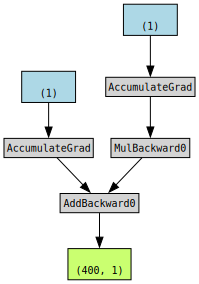

In [184]:
from torchviz import make_dot

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, 
                dtype=torch.float, 
                device=device)
w = torch.randn(1, requires_grad=True, 
                dtype=torch.float, 
                device=device)

# Step 1 - Computes our model's predicted output - forward pass
y_pred = b + w * x_train_tensor

# Step 2 - Computes the loss
error = (y_pred - y_train_tensor)
loss = (error ** 2).mean()

# We can try plotting the graph for any variable: yhat, error, loss
make_dot(yhat)

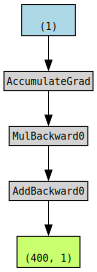

In [189]:
b_nograd = torch.randn(1, 
                       requires_grad=False, 
                       dtype=torch.float, 
                       device=device)

w_nograd = torch.randn(1, 
                       requires_grad=False, 
                       dtype=torch.float, 
                       device=device)

y_pred = b_nograd + w * x_train_tensor
make_dot(y_pred)

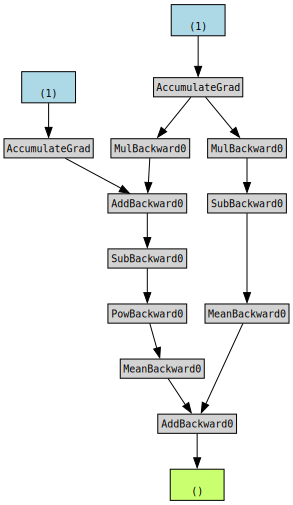

In [191]:
b = torch.randn(1, requires_grad=True, 
                dtype=torch.float, 
                device=device)
w = torch.randn(1, requires_grad=True, 
                dtype=torch.float, 
                device=device)

y_pred = b + w * x_train_tensor

error = (y_pred - y_train_tensor)
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    y_pred2 = w * x_train_tensor
    error2 = y_pred2 - y_train_tensor

# neither does this!!
loss += error2.mean()
    
# We can try plotting the graph for any variable: yhat, error, loss
make_dot(loss)

## Optimizer

In [192]:
from torch import optim as optim

In [193]:
# Defines an SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

In [194]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient 
    # descent. How wrong is our model? That's the error! 
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()
    
print(b)
print(w)

tensor([1.9877], device='cuda:0', requires_grad=True)
tensor([4.0233], device='cuda:0', requires_grad=True)


## Loss

In [196]:
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [199]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

In [203]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    y_pred = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(y_pred, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b)
print(w)

tensor([1.9877], device='cuda:0', requires_grad=True)
tensor([4.0233], device='cuda:0', requires_grad=True)


In [208]:
loss

tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>)

In [206]:
#loss.cpu().numpy()  # this will throw an error

In [207]:
loss.detach().cpu().numpy()

array(0.00998497, dtype=float32)

In [209]:
print(loss.item(), loss.tolist())

0.009984973818063736 0.009984973818063736


## Model